In [1]:
import pandas as pd
import numpy as np 
import requests
import json
from pprint import pprint
from config import key_dict
from datetime import datetime
import time
import gmaps
import matplotlib as plt

In [2]:
base_url = "http://api.openweathermap.org/data/2.5/air_pollution/history?"
key = key_dict['owm']
lat = 32.7157
lng = 117.1611
start = 1521356400 #sunday march 18th 2018
end = 1616050800 #sunday march 18th 2021

In [3]:
url = f"{base_url}lat={lat}&lon={lng}&start={start}&end={end}&appid={key}"

data = requests.get(url).json()


In [4]:
#pprint(data)

In [5]:
aqi_df = pd.DataFrame(columns = ['Date','Lat','Long','AQI','CO','NO','NO2','O3','SO2','PM2.5','PM10','NH3'])

for i in range(len(data['list'])):

    components = data['list'][i]['components']

    aqi_df = aqi_df.append({'Date':datetime.fromtimestamp(data['list'][i]['dt']),
                            'Lat':data['coord']['lat'], 'Long':data['coord']['lon'],
                          'AQI':data['list'][i]['main']['aqi'], 'CO':components['co'], 'NO':components['no'],
                          'NO2':components['no2'], 'O3':components['o3'], 
                           'SO2':components['so2'], 'PM2.5':components['pm2_5'], 'PM10':components['pm10'],
                           'NH3':components['nh3']}, ignore_index = True)

# aqi_df.set_index('Date', inplace = True)

#format date to just years
#aqi_df['Year']  = aqi_df['Date'].dt.year

aqi_df


,Date,Lat,Long,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
0,2020-11-24 17:00:00,32.7157,117.1611,5,1054.76,20.79,40.44,5.14,34.81,114.88,134.02,0.18
1,2020-11-24 18:00:00,32.7157,117.1611,5,1081.47,23.92,41.13,5.99,41.01,120.87,141.88,0.32
2,2020-11-24 19:00:00,32.7157,117.1611,5,1108.17,23.69,45.24,3.00,45.78,126.01,148.66,0.71
3,2020-11-24 20:00:00,32.7157,117.1611,5,801.09,9.95,50.72,2.17,51.02,89.91,103.12,0.05
4,2020-11-24 21:00:00,32.7157,117.1611,5,700.95,7.71,47.98,5.99,48.64,75.60,84.50,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
2690,2021-03-17 20:00:00,32.7157,117.1611,5,514.03,1.06,27.42,52.93,26.94,74.60,87.75,7.22
2691,2021-03-17 21:00:00,32.7157,117.1611,5,473.98,1.08,26.05,56.51,26.46,63.72,75.46,7.16
2692,2021-03-17 22:00:00,32.7157,117.1611,5,427.25,0.79,23.65,65.09,25.51,53.71,63.58,6.78
2693,2021-03-17 23:00:00,32.7157,117.1611,4,397.21,0.71,21.59,71.53,24.32,49.13,58.45,7.22


In [6]:
#drop any rows w missing data
clean_aqi_df = aqi_df.dropna(how = 'any')
clean_aqi_df
#I guess the info is complete! 

,Date,Lat,Long,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
0,2020-11-24 17:00:00,32.7157,117.1611,5,1054.76,20.79,40.44,5.14,34.81,114.88,134.02,0.18
1,2020-11-24 18:00:00,32.7157,117.1611,5,1081.47,23.92,41.13,5.99,41.01,120.87,141.88,0.32
2,2020-11-24 19:00:00,32.7157,117.1611,5,1108.17,23.69,45.24,3.00,45.78,126.01,148.66,0.71
3,2020-11-24 20:00:00,32.7157,117.1611,5,801.09,9.95,50.72,2.17,51.02,89.91,103.12,0.05
4,2020-11-24 21:00:00,32.7157,117.1611,5,700.95,7.71,47.98,5.99,48.64,75.60,84.50,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
2690,2021-03-17 20:00:00,32.7157,117.1611,5,514.03,1.06,27.42,52.93,26.94,74.60,87.75,7.22
2691,2021-03-17 21:00:00,32.7157,117.1611,5,473.98,1.08,26.05,56.51,26.46,63.72,75.46,7.16
2692,2021-03-17 22:00:00,32.7157,117.1611,5,427.25,0.79,23.65,65.09,25.51,53.71,63.58,6.78
2693,2021-03-17 23:00:00,32.7157,117.1611,4,397.21,0.71,21.59,71.53,24.32,49.13,58.45,7.22


In [7]:
#create scatterplot for this info by year
aqi_2021_df = aqi_df[aqi_df['Date'].dt.year == 2021]
#aqi_df['Date'].dt.year.unique()
aqi_2021_df

,Date,Lat,Long,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
895,2021-01-01 00:00:00,32.7157,117.1611,5,654.22,6.65,36.67,55.79,41.49,60.04,79.46,5.32
896,2021-01-01 01:00:00,32.7157,117.1611,5,841.14,2.43,49.35,37.55,39.58,79.43,105.87,7.28
897,2021-01-01 02:00:00,32.7157,117.1611,5,1028.06,0.22,60.32,22.89,44.82,97.81,132.22,10.39
898,2021-01-01 03:00:00,32.7157,117.1611,5,1255.04,0.54,68.55,13.77,50.55,119.98,163.29,13.05
899,2021-01-01 04:00:00,32.7157,117.1611,5,1522.06,1.58,78.14,5.99,58.17,146.77,198.55,15.71
...,...,...,...,...,...,...,...,...,...,...,...,...
2690,2021-03-17 20:00:00,32.7157,117.1611,5,514.03,1.06,27.42,52.93,26.94,74.60,87.75,7.22
2691,2021-03-17 21:00:00,32.7157,117.1611,5,473.98,1.08,26.05,56.51,26.46,63.72,75.46,7.16
2692,2021-03-17 22:00:00,32.7157,117.1611,5,427.25,0.79,23.65,65.09,25.51,53.71,63.58,6.78
2693,2021-03-17 23:00:00,32.7157,117.1611,4,397.21,0.71,21.59,71.53,24.32,49.13,58.45,7.22


In [8]:
aqi_2020_df = aqi_df[aqi_df['Date'].dt.year == 2020]
aqi_2020_df

,Date,Lat,Long,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
0,2020-11-24 17:00:00,32.7157,117.1611,5,1054.76,20.79,40.44,5.14,34.81,114.88,134.02,0.18
1,2020-11-24 18:00:00,32.7157,117.1611,5,1081.47,23.92,41.13,5.99,41.01,120.87,141.88,0.32
2,2020-11-24 19:00:00,32.7157,117.1611,5,1108.17,23.69,45.24,3.00,45.78,126.01,148.66,0.71
3,2020-11-24 20:00:00,32.7157,117.1611,5,801.09,9.95,50.72,2.17,51.02,89.91,103.12,0.05
4,2020-11-24 21:00:00,32.7157,117.1611,5,700.95,7.71,47.98,5.99,48.64,75.60,84.50,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
890,2020-12-31 19:00:00,32.7157,117.1611,5,907.90,20.12,39.07,46.49,60.08,76.04,95.98,8.87
891,2020-12-31 20:00:00,32.7157,117.1611,4,554.09,13.19,31.87,64.37,50.55,43.72,55.95,3.96
892,2020-12-31 21:00:00,32.7157,117.1611,4,467.30,10.39,27.76,71.53,44.35,36.85,47.23,2.82
893,2020-12-31 22:00:00,32.7157,117.1611,4,433.92,8.27,26.05,76.53,41.01,36.04,45.69,2.31


In [9]:
#this is a cell! 

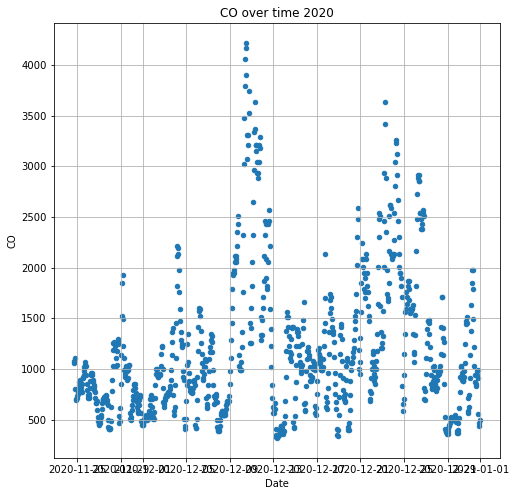

In [10]:
#CO over time for 2020
co_data_2020 = aqi_2020_df.plot(kind="scatter", x="Date", y="CO", grid=True, figsize=(8,8),
              title="CO over time 2020")

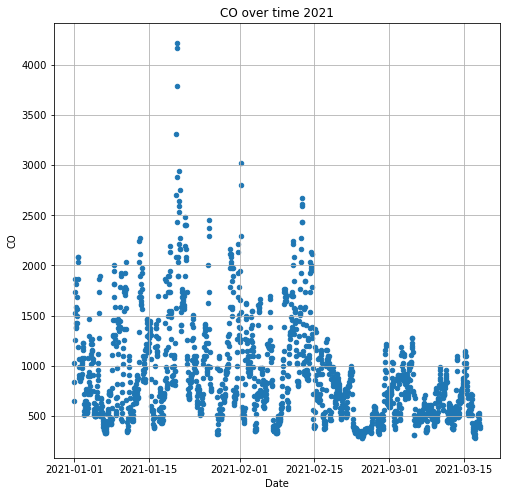

In [11]:
#CO over time for 2021
co_data_2021= aqi_2021_df.plot(kind="scatter", x="Date", y="CO", grid=True, figsize=(8,8),
              title="CO over time 2021")

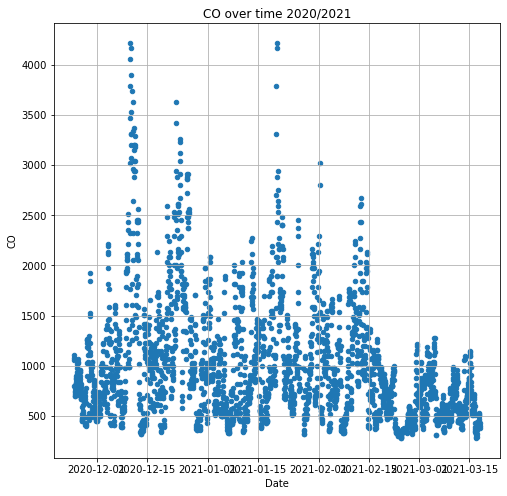

In [12]:
#CO over time 2020 & 2021
aqi_df.plot(kind="scatter", x="Date", y="CO", grid=True, figsize=(8,8),title="CO over time 2020/2021")

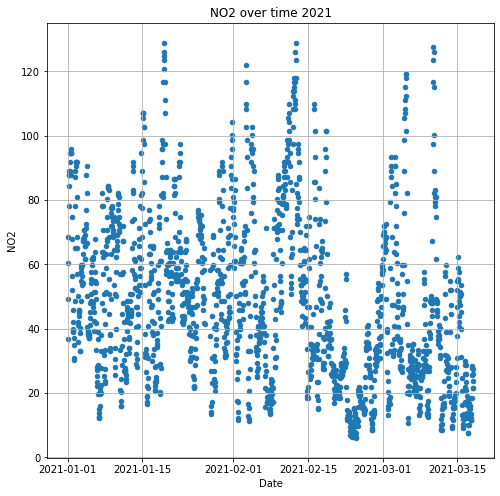

In [13]:
#No2 over time 2021
no2_data_2021= aqi_2021_df.plot(kind="scatter", x="Date", y="NO2", grid=True, figsize=(8,8),
              title="NO2 over time 2021")

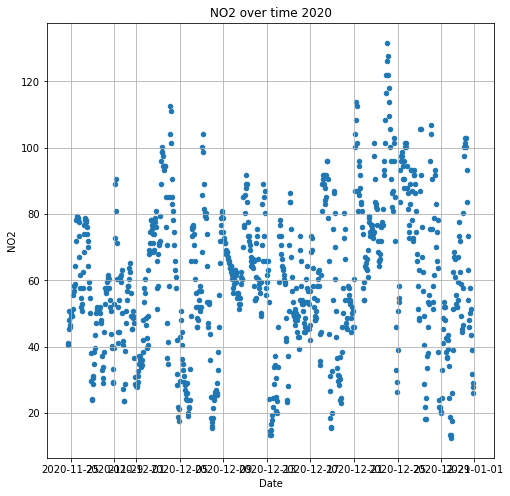

In [14]:
#NO2 over time 2020
no2_data_2020= aqi_2020_df.plot(kind="scatter", x="Date", y="NO2", grid=True, figsize=(8,8),
              title="NO2 over time 2020")

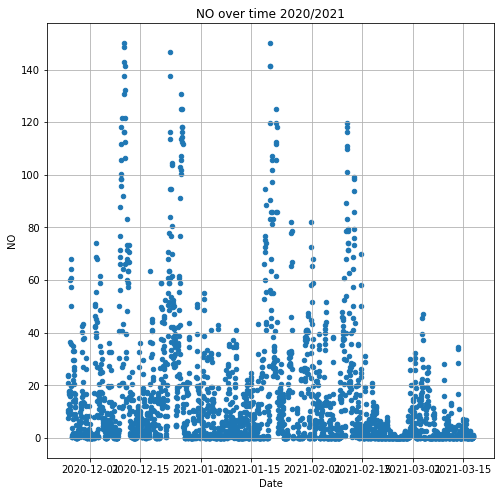

In [15]:
#NO over time 2020 & 2021
aqi_df.plot(kind="scatter", x="Date", y="NO", grid=True, figsize=(8,8),
              title="NO over time 2020/2021")

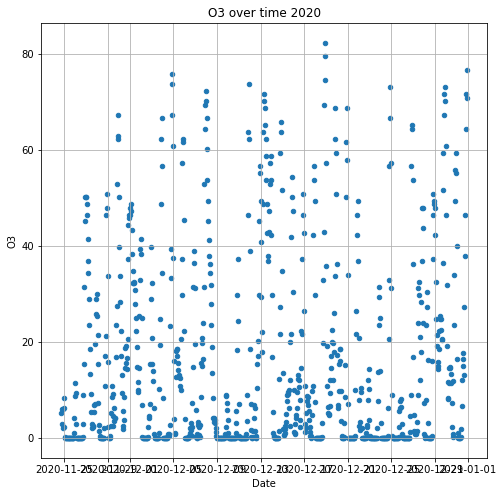

In [16]:
#o3 over time 2020
o3_data_2020= aqi_2020_df.plot(kind="scatter", x="Date", y="O3", grid=True, figsize=(8,8),
              title="O3 over time 2020")

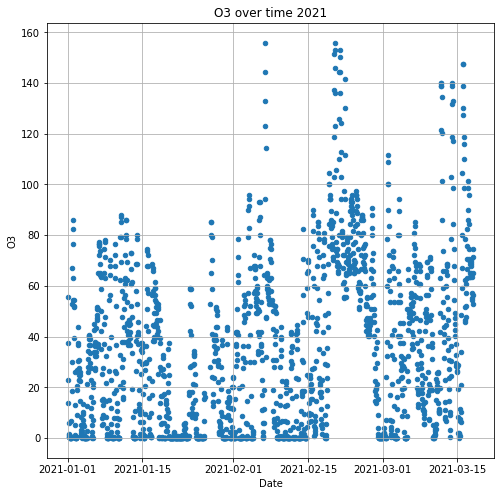

In [17]:
#o3 over time 2021
o3_data_2021= aqi_2021_df.plot(kind="scatter", x="Date", y="O3", grid=True, figsize=(8,8),
              title="O3 over time 2021")

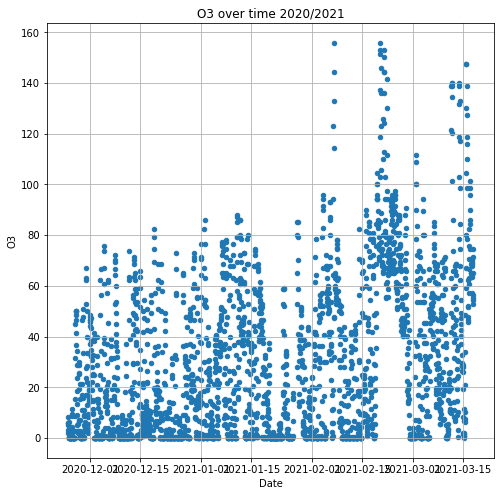

In [18]:
#O3 over time 2020 / 2021
aqi_df.plot(kind="scatter", x="Date", y="O3", grid=True, figsize=(8,8),title="O3 over time 2020/2021")

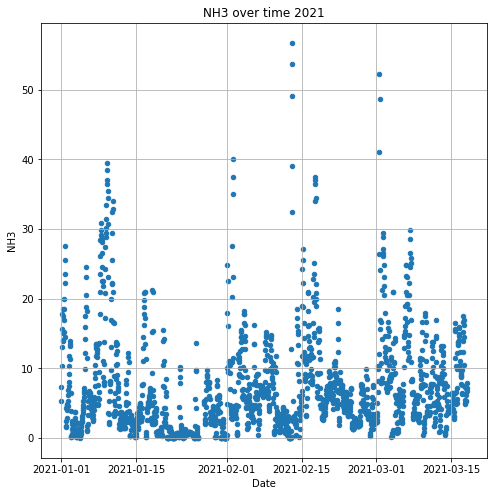

In [19]:
#nh3 over time 2021
nh3_data_2021= aqi_2021_df.plot(kind="scatter", x="Date", y="NH3", grid=True, figsize=(8,8),
              title="NH3 over time 2021")

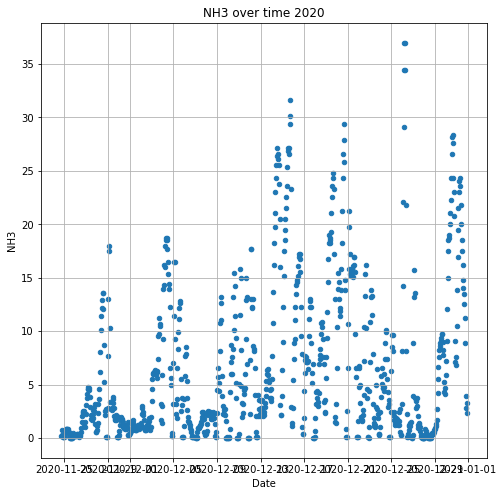

In [20]:
#NH3 over time 2020
nh3_data_2020= aqi_2020_df.plot(kind="scatter", x="Date", y="NH3", grid=True, figsize=(8,8),
              title="NH3 over time 2020")

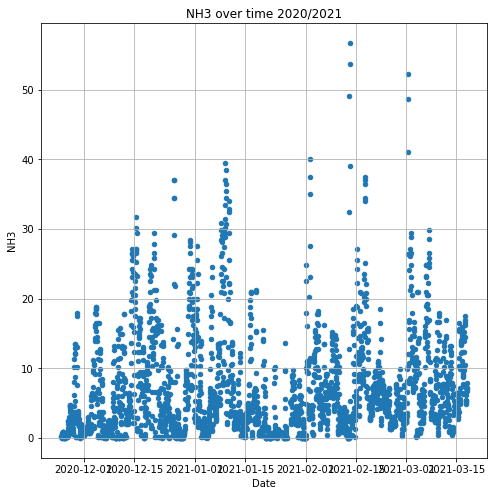

In [21]:
#NH3 over time 2020/2021
aqi_df.plot(kind="scatter", x="Date", y="NH3", grid=True, figsize=(8,8),title="NH3 over time 2020/2021")